In [69]:
#!pip install plotly

In [70]:
import pandas as pd
import statistics as sta
import plotly.graph_objs as go
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import numpy as np

In [71]:
train_csv_path = "df_titanic/train.csv"
df_train = pd.read_csv(train_csv_path)

test_csv_path = "df_titanic/test.csv"
df_test = pd.read_csv(test_csv_path)


In [72]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [73]:
#Entendimento dos dados

# Tratamento de dados

In [74]:
df_train.groupby(['Sex', 'Pclass', 'Survived'],as_index = False).count()

,Sex,Pclass,Survived,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,female,1,0,3,3,3,3,3,3,3,3,3
1,female,1,1,91,91,82,91,91,91,91,78,89
2,female,2,0,6,6,6,6,6,6,6,1,6
3,female,2,1,70,70,68,70,70,70,70,9,70
4,female,3,0,72,72,55,72,72,72,72,2,72
5,female,3,1,72,72,47,72,72,72,72,4,72
6,male,1,0,77,77,61,77,77,77,77,56,77
7,male,1,1,45,45,40,45,45,45,45,39,45
8,male,2,0,91,91,84,91,91,91,91,2,91
9,male,2,1,17,17,15,17,17,17,17,4,17


In [75]:
df_vazio = df_train[df_train['Age'].isnull()]

In [76]:
df_vazio = df_vazio.groupby(['PassengerId', 'Sex'], as_index=False).count()

In [77]:
df_vazio = df_vazio.groupby(['Sex'])['Age'].count().reset_index(name='Quantidade de idade vazia')

Text(0.5, 1.0, 'Quantidade de NAs nos registros')

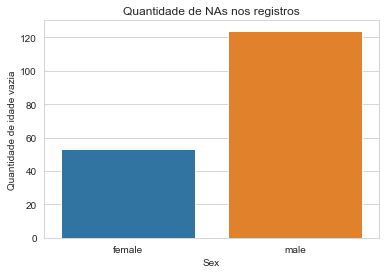

In [78]:
sns.barplot(x='Sex', y='Quantidade de idade vazia', data=df_vazio).set_title('Quantidade de NAs nos registros')

In [79]:
df_full = df_train[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age']].dropna().copy()

In [80]:
df_full['Sex_d'] = df_full.Sex.map({'female':0, 'male':1})

In [81]:
df_full = df_full.drop(columns={'Sex'}).rename(columns={'Sex_d':'Sex_Male'})


In [82]:
#df_full = df_full.fillna(27)


In [83]:
df_full[df_full['Age'].isnull()]

,PassengerId,Survived,Pclass,Age,Sex_Male


# Faixa Etaria

In [84]:
binn = []
for x in range(0, 90, 10):
    binn.append(x)
binn

[0, 10, 20, 30, 40, 50, 60, 70, 80]

In [85]:
df_age = df_train.groupby(['Sex', 'Pclass', 'Survived'], as_index = True)['PassengerId'].count()

In [86]:
df_age = df_age.rename(columns={'PassengerId': 'Count'}, inplace=True)

In [87]:
 df_age = df_age.reset_index(name='Count')

In [88]:
df_female = df_age[df_age['Sex'] == 'female']

In [89]:
df_female

,Sex,Pclass,Survived,Count
0,female,1,0,3
1,female,1,1,91
2,female,2,0,6
3,female,2,1,70
4,female,3,0,72
5,female,3,1,72


In [90]:
df_male = df_age.reset_index()

Text(0.5, 1.0, 'Sobrevivência de Mulheres')

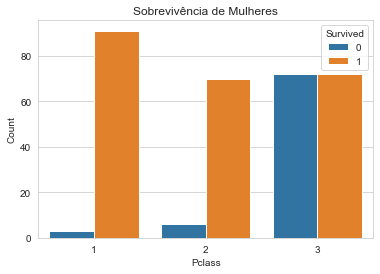

In [91]:
sns.barplot(x = "Pclass", y = "Count", data = df_female, hue = "Survived").set_title('Sobrevivência de Mulheres')

Text(0.5, 1.0, 'Sobrevivência de Homens')

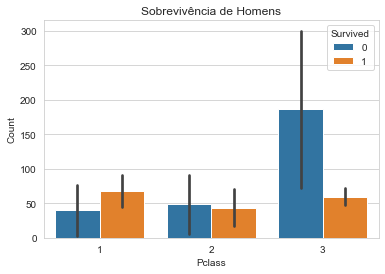

In [92]:
sns.barplot(x = 'Pclass', y = 'Count', data = df_male, hue= 'Survived').set_title('Sobrevivência de Homens')

In [93]:
df_age = df_train.groupby(['Sex', 'Pclass', 'Survived', pd.cut(df_train['Age'], binn)], as_index = True)['Age'].count()

In [94]:
#Para resetar o indice e nomear a coluna count
df_age = df_age.reset_index(name='count')

In [95]:
df_age_f = df_age[df_age['Sex'] == 'female']

In [96]:
df_age_f.head()

,Sex,Pclass,Survived,Age,count
0,female,1,0,"(0, 10]",1
1,female,1,0,"(20, 30]",1
2,female,1,0,"(40, 50]",1
3,female,1,1,"(10, 20]",13
4,female,1,1,"(20, 30]",20


Text(0.5, 1.0, 'Sobrevivência por idade mulheres')

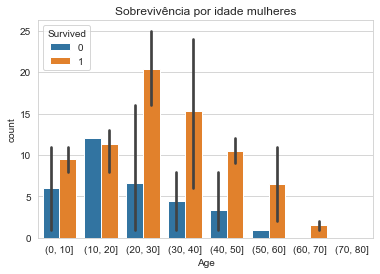

In [97]:
sns.barplot(x='Age', y='count', data=df_age_f, hue='Survived', ).set_title('Sobrevivência por idade mulheres')

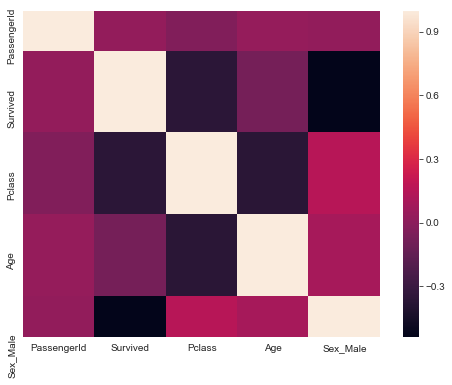

In [98]:
correlation = df_full.corr()
correlation['Age'].sort_values(ascending = False).head(15)

f, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(correlation)
plt.show()

In [99]:
teste3 = df_female['Count'].reset_index()

# Machine Learning

In [100]:
from sklearn.model_selection import train_test_split

# Regressão Linear Logistica

In [101]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
df_full.head()

,PassengerId,Survived,Pclass,Age,Sex_Male
0,1,0,3,22.0,1
1,2,1,1,38.0,0
2,3,1,3,26.0,0
3,4,1,1,35.0,0
4,5,0,3,35.0,1


In [103]:
X_train, X_test, y_train, y_test = train_test_split(df_full[['Pclass', 'Sex_Male', 'Age']], df_full.Survived, train_size = 0.7, random_state=1)

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
model = LogisticRegression()

In [106]:
model.fit(X_train, y_train)

C:\Users\BrunoDefantedaSilva\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
yhat = model.predict(X_test)


In [108]:
accuracy_score(y_test, yhat)


0.7767441860465116

In [109]:
precision_score(y_test, yhat)

0.7142857142857143

In [110]:
f1_score(y_test, yhat)

0.6962025316455697

In [111]:
#Criando a comparacao

In [112]:
yhat2 = pd.DataFrame(yhat).rename(columns = {0:'Predito'})

In [113]:
yhat2 = yhat2.set_index(y_test.index)

In [114]:
y_test2 = pd.DataFrame(y_test)

In [115]:
y_test2['Predito'] = yhat2['Predito']

In [116]:
#pd.options.display.max_rows = 60

In [117]:
y_test2

,Survived,Predito
689,1,1
278,0,0
506,1,1
9,1,1
494,0,0
...,...,...
333,0,0
383,1,1
396,0,1
279,1,1


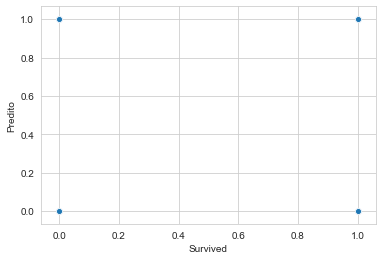

In [118]:
sns.set_style('whitegrid')
sns.scatterplot(x='Survived', y='Predito', data=y_test2)

# Árvore de decisão

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [120]:
df_full[['Pclass', 'Age', 'Sex_Male']].head()

,Pclass,Age,Sex_Male
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1


In [121]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_full[['Pclass', 'Age', 'Sex_Male']], df_full.Survived, train_size=0.75, random_state=1)

In [122]:
model_tree = DecisionTreeClassifier()

In [123]:
model_tree.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [124]:
df_full

,PassengerId,Survived,Pclass,Age,Sex_Male
0,1,0,3,22.0,1
1,2,1,1,38.0,0
2,3,1,3,26.0,0
3,4,1,1,35.0,0
4,5,0,3,35.0,1
...,...,...,...,...,...
885,886,0,3,39.0,0
886,887,0,2,27.0,1
887,888,1,1,19.0,0
889,890,1,1,26.0,1


In [128]:
yhat = model_tree.predict(X_test2)

In [129]:
#Accuracy Metric. It's the proportion of true values among of the total numbers of the classes examined.
accuracy_score(y_test2, yhat)

0.8547486033519553

In [59]:
#Precision Metric. It's the proportion of true values that are really true
precision_score(y_test2, yhat)

0.8596491228070176

In [127]:
#F1_Score Metric. It's a number between 0 and 1. It's a hamonic mean of Precision and Recall Metrics
f1_score(y_test2, yhat)

0.7903225806451613

In [60]:
pd.options.display.max_rows = 60

In [61]:
#df_full.head()

In [62]:
yhat = pd.DataFrame(yhat).rename(columns = {0:'Predito'})

In [63]:
yhat = yhat.set_index(y_test2.index)

In [64]:
y_test2 = pd.DataFrame(y_test2)
y_test2['Predito'] = yhat['Predito']

In [65]:
y_test2

,Survived,Predito
689,1,1
278,0,0
506,1,1
9,1,1
494,0,0
...,...,...
322,1,1
597,0,0
436,0,0
257,1,1
